In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fraud-detection


In [3]:
# reading the data
data_train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
data_test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [4]:
# combining all train and test data
full_data = pd.concat([data_train, data_test], axis=0)
full_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# ****Data Cleansing**** 

In [5]:
full_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# check for duplicated records
full_data.duplicated().sum()

0

In [7]:
# drop irrelevent col 
full_data.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'first', 'last', 'unix_time', 'trans_num', 'street', 'city'], inplace=True)

In [8]:
# convert to correct datetime type
full_data['trans_date_trans_time'] = pd.to_datetime(full_data['trans_date_trans_time'])

In [9]:
# extract features from data - feature engg
full_data['day'] = full_data['trans_date_trans_time'].dt.day
full_data['month'] = full_data['trans_date_trans_time'].dt.month
full_data['year'] = full_data['trans_date_trans_time'].dt.year
full_data['hour'] = full_data['trans_date_trans_time'].dt.hour
full_data['minute'] = full_data['trans_date_trans_time'].dt.minute

full_data.drop(columns=['trans_date_trans_time'], inplace=True)

In [10]:
# extract age of person
full_data['dob'] = pd.to_datetime(full_data['dob'])
full_data['year_dob'] = full_data['dob'].dt.year
full_data['age'] = full_data['year'] - full_data['year_dob']


In [11]:
full_data.sample(10)

,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,day,month,year,hour,minute,year_dob,age
530576,"fraud_Dare, Fritsch and Zboncak",health_fitness,63.39,M,IL,60091,42.0765,-87.7246,27020,Trade mark attorney,...,42.379437,-88.525976,0,26,12,2020,19,9,1986,34
755208,fraud_Heaney-Marquardt,entertainment,79.50,M,SD,57641,45.7084,-101.1546,295,"Designer, industrial/product",...,46.340892,-101.793294,0,18,11,2019,20,6,1981,38
303610,fraud_Goyette-Herzog,travel,7.86,M,NV,89512,39.5483,-119.7957,276896,Immunologist,...,38.614004,-120.588575,0,27,5,2019,14,46,1997,22
499096,fraud_Barrows PLC,shopping_pos,136.01,M,MS,39113,32.9013,-91.0286,595,Technical brewer,...,32.470328,-91.121542,0,5,8,2019,2,57,1979,40
592427,fraud_Ratke and Sons,health_fitness,23.80,F,NH,3816,43.6849,-71.2551,1368,"Optician, dispensing",...,43.325966,-71.044169,0,8,9,2019,14,54,1971,48
6051,"fraud_Schaefer, Fay and Hilll",entertainment,118.52,M,TN,37754,36.1150,-84.0438,4729,"Geologist, wellsite",...,35.189606,-84.519168,0,22,6,2020,23,45,1982,38
668503,fraud_Barton Inc,grocery_pos,187.96,F,GA,31563,31.6489,-82.1982,1324,"Engineer, technical sales",...,32.335873,-82.143130,0,12,10,2019,11,31,1926,93
1077494,fraud_Howe PLC,entertainment,24.74,F,OR,97014,45.6710,-121.8686,1288,Barrister,...,46.329709,-122.868173,0,23,3,2020,16,4,1936,84
1032123,"fraud_Hills, Hegmann and Schaefer",health_fitness,12.67,F,NY,12419,41.8467,-74.1038,722,Comptroller,...,42.465625,-74.905004,0,3,3,2020,13,45,1990,30
223641,fraud_Beier-Hyatt,shopping_pos,2.43,F,GA,31046,33.1194,-83.8235,3343,Theatre manager,...,32.881735,-83.187996,0,22,4,2019,21,50,1990,29


# ****EDA**** 

In [12]:
# statistical insights for numeric-datatypes features
full_data.describe()

,amt,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,day,month,year,hour,minute,year_dob,age
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1973-10-15 11:05:05.744458240,3.853898e+01,-9.022794e+01,5.210015e-03,1.585076e+01,7.152067e+00,2.019501e+03,1.280612e+01,2.949731e+01,1.973289e+03,4.621138e+01
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,1.924000e+03,1.400000e+01
25%,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1962-08-13 00:00:00,3.474012e+01,-9.689944e+01,0.000000e+00,8.000000e+00,4.000000e+00,2.019000e+03,7.000000e+00,1.400000e+01,1.962000e+03,3.300000e+01
50%,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1975-11-30 00:00:00,3.936890e+01,-8.744069e+01,0.000000e+00,1.600000e+01,7.000000e+00,2.020000e+03,1.400000e+01,3.000000e+01,1.975000e+03,4.400000e+01
75%,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-04-23 00:00:00,4.195626e+01,-8.024511e+01,0.000000e+00,2.400000e+01,1.000000e+01,2.020000e+03,1.900000e+01,4.500000e+01,1.987000e+03,5.700000e+01
max,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,6.751027e+01,-6.695090e+01,1.000000e+00,3.100000e+01,1.200000e+01,2.020000e+03,2.300000e+01,5.900000e+01,2.005000e+03,9.600000e+01
std,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,NaN,5.105604e+00,1.375969e+01,7.199217e-02,8.876245e+00,3.424954e+00,4.999996e-01,6.815753e+00,1.732627e+01,1.739057e+01,1.739545e+01


In [13]:
# statistical insights for non-numeric-datatypes features

full_data.describe(include='object')

,merchant,category,gender,state,job
count,1852394,1852394,1852394,1852394,1852394
unique,693,14,2,51,497
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor
freq,6262,188029,1014749,135269,13898


In [14]:
full_data["is_fraud"].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

## Fraud Rate by Category, Gender

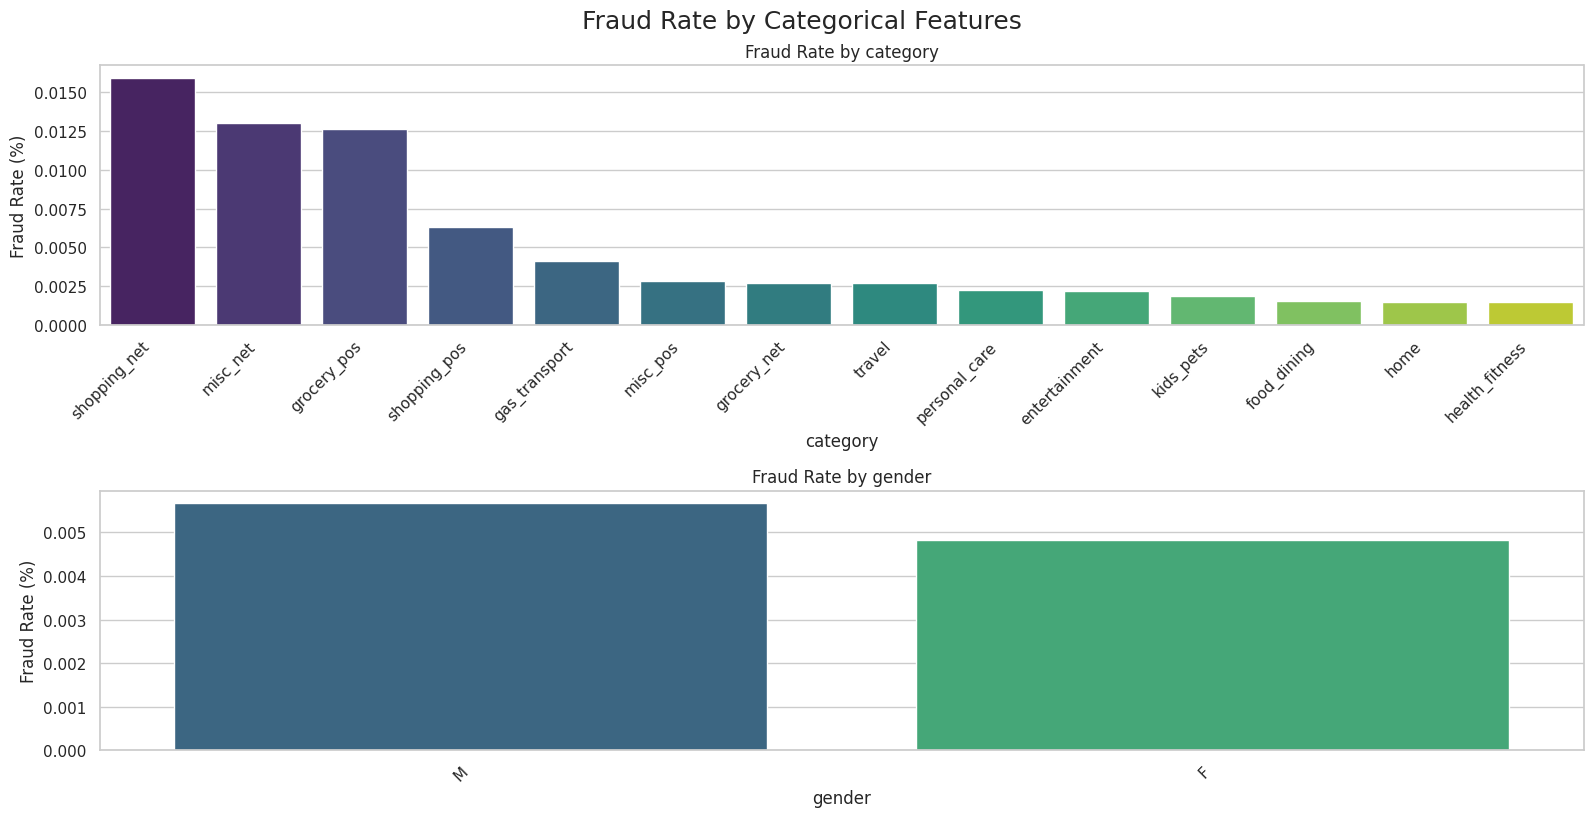

In [15]:
data = full_data

# List of categorical columns to compare
categorical_cols = ['category', 'gender']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    temp = data.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
plt.show()

In [16]:
X = data.drop(columns=[
    'state', 'zip',
    'dob', 'year_dob', 'is_fraud'  
])

y = data['is_fraud']

In [17]:
X

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,day,month,year,hour,minute,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,1,1,2019,0,0,31
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,1,1,2019,0,0,41
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,1,1,2019,0,0,57
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,1,1,2019,0,1,52
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,1,1,2019,0,3,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,31,12,2020,23,59,54
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,31,12,2020,23,59,21
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,31,12,2020,23,59,39
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,31,12,2020,23,59,55


In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

In [19]:
X.to_csv('/kaggle/working/X.csv', index=False)
y.to_csv('/kaggle/working/y.csv', index=False)

# Data Preprocessing for Model Training

## ****Categorical Encoding and Z-Score Normalization****

In [20]:
X = pd.read_csv('/kaggle/working/X.csv')
y = pd.read_csv('/kaggle/working/y.csv')

In [21]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['gender', 'merchant', 'category', 'job']

# Initialize encoder
le = LabelEncoder()

# Encode each column
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [23]:
print(f"X_train shape: ", X_train.shape)
print(f"y_train shape: ", y_train.shape)
print()
print(f"Training dataset fraud samples: ", y_train.value_counts())
print()
print()
print(f"X_test shape: ", X_test.shape)
print(f"y-test shape: ", y_test.shape)
print()
print(f"Testing dataset fraud samples: ", y_test.value_counts())

X_train shape:  (1574534, 16)
y_train shape:  (1574534, 1)

Training dataset fraud samples:  is_fraud
0           1566360
1              8174
Name: count, dtype: int64


X_test shape:  (277860, 16)
y-test shape:  (277860, 1)

Testing dataset fraud samples:  is_fraud
0           276383
1             1477
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns to scale
cols_to_scale = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'day', 'month', 'year', 'hour', 'minute', 'age']

# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on X_train only and transform
X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Use the same scaler to transform X_test
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [25]:
X_train_scaled

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,day,month,year,hour,minute,age
681478,480,12,-0.226950,0,0.937560,-0.507385,-0.291217,311,0.985912,-0.503384,0.129015,0.831697,-1.001276,1.495422,1.010185,0.045430
1173083,207,5,-0.380055,1,1.518089,-1.593624,-0.287472,330,1.553861,-1.612441,-1.335766,-0.628066,0.998726,0.761708,0.548287,0.390435
127158,549,2,-0.143545,0,0.557955,-0.566707,-0.288103,444,0.735084,-0.583767,-0.547038,-1.211972,-1.001276,-0.265491,0.259601,-0.012071
1593548,192,7,-0.028996,1,0.176554,0.204500,-0.293455,287,0.223163,0.160285,-0.547038,0.831697,0.998726,0.027994,-1.357043,0.390435
913411,470,0,-0.429887,1,0.468249,1.150456,-0.243219,374,0.653855,1.199632,1.481121,1.415603,-1.001276,0.468222,-0.490984,-1.162087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,191,9,-0.422100,0,0.578126,1.284305,-0.275856,271,0.425936,1.348991,-0.772389,-0.628066,-1.001276,-0.999205,1.414346,0.505436
1414414,292,13,-0.379806,0,-0.983380,-0.023689,-0.288312,144,-0.940517,0.025052,-1.673793,0.247792,0.998726,1.055194,-1.068356,-0.702080
131932,680,6,0.300076,0,-0.694507,-1.188670,-0.292880,442,-0.723445,-1.163604,-0.321687,-1.211972,-1.001276,1.201936,0.952448,-0.299575
671155,409,12,-0.401732,1,1.998946,-0.464185,-0.293445,149,1.817237,-0.529366,-0.321687,0.831697,-1.001276,-0.558977,-0.086823,1.770454


# Supervised Machine Learning Method - With Fraud and Not Fraud Labels

## 1. Model Training - Logistic Regression

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix

def eval(model, X_train_scaled, X_test_scaled, y_test, y_pred_train, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("Train_Set - Confusion Matrix")
    print(classification_report(y_train,y_pred_train))
    print("Test_Set - Confusion Matrix")
    print(classification_report(y_test,y_pred))
    print("---"*20)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

In [27]:
# 1. Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Base model
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred = lr.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print("Accuracy     :", acc)
print("Recall       :", rec)
print("Precision    :", prec)

Accuracy     : 0.9457172676887641
Recall       : 0.7582938388625592
Precision    : 0.07068029786696958


Logistic Regression Model
------------------
[[261657  14726]
 [   357   1120]]
Train_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1566360
           1       0.07      0.76      0.13      8174

    accuracy                           0.95   1574534
   macro avg       0.53      0.85      0.55   1574534
weighted avg       0.99      0.95      0.97   1574534

Test_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    276383
           1       0.07      0.76      0.13      1477

    accuracy                           0.95    277860
   macro avg       0.53      0.85      0.55    277860
weighted avg       0.99      0.95      0.97    277860

------------------------------------------------------------


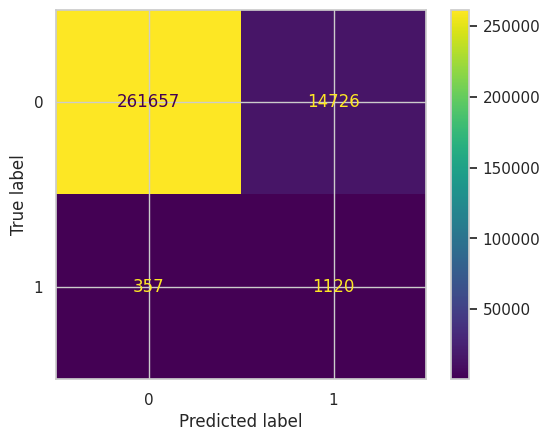

In [28]:
print("Logistic Regression Model")
print("------------------")
eval(lr, X_train_scaled, X_test_scaled, y_test, y_pred_train, y_pred)

### 5-Fold Cross Validation for Logistic Regression

In [29]:
# Cross Validation on Logistic Regression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

print('Cross Validation scores for Logistic Regression with default parameters')

lr_cv = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state = 42)
lr_cv_scores = cross_validate(lr_cv, X_train_scaled, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 5)
lr_cv_scores = pd.DataFrame(lr_cv_scores, index = range(1, 6))
lr_cv_scores.mean()[2:]

Cross Validation scores for Logistic Regression with default parameters


test_accuracy     0.945488
test_precision    0.068892
test_recall       0.758992
test_f1           0.126315
test_roc_auc      0.859969
dtype: float64

In [30]:
lr_cv_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,14.569115,0.563735,0.944037,0.067892,0.768196,0.124758,0.862755
2,12.325544,0.529605,0.944841,0.068739,0.766972,0.126170,0.865295
3,13.155648,0.503162,0.946114,0.067764,0.735168,0.124090,0.847886
4,14.545209,0.505051,0.946425,0.070284,0.762080,0.128699,0.861088
5,12.431860,0.498604,0.946022,0.069780,0.762546,0.127860,0.862823


### Grid Search for Logistic Regression

In [31]:
param_grid = { "class_weight" : ["balanced"],
              'penalty': ["l2", "l1"], # 'elasticnet'
              'solver' : ['saga','lbfgs','liblinear'], # 'newton-cholesky'
              }

In [32]:
import warnings
warnings.filterwarnings('ignore')
lr_grid = LogisticRegression(class_weight = 'balanced', random_state = 42)
lr_grid_model = GridSearchCV(lr_grid, param_grid, scoring = "f1", cv = 3, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....class_weight=balanced, penalty=l2, solver=saga; total time= 1.6min
[CV] END .....class_weight=balanced, penalty=l1, solver=saga; total time= 2.2min
[CV] END .....class_weight=balanced, penalty=l2, solver=saga; total time= 1.7min
[CV] END .....class_weight=balanced, penalty=l1, solver=saga; total time= 2.0min
[CV] END class_weight=balanced, penalty=l1, solver=liblinear; total time= 7.4min
[CV] END .....class_weight=balanced, penalty=l2, solver=saga; total time= 1.8min
[CV] END ....class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.4s
[CV] END ....class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.4s
[CV] END ....class_weight=balanced, penalty=l1, solver=lbfgs; total time=   0.4s
[CV] END class_weight=balanced, penalty=l1, solver=liblinear; total time= 9.4min
[CV] END ....class_weight=balanced, penalty=l2, solver=lbfgs; total time=  13.8s
[CV] END ....class_weight=balanced, penalty=l2, solver=lbfgs; total time=  11.9s
[CV] END ....class_weight=ba

In [33]:
print('Best Estimators of GridSearchCV for Logistic Regression Model: ', lr_grid_model.best_estimator_)

Best Estimators of GridSearchCV for Logistic Regression Model:  LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')


In [34]:
print('Best Parameters of GridSearchCV for Logistic Regression Model: ', lr_grid_model.best_params_)

Best Parameters of GridSearchCV for Logistic Regression Model:  {'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [35]:
lr_tuned = LogisticRegression(class_weight = 'balanced',
                                  penalty = 'l1', 
                                  solver = 'liblinear',
                                  random_state = 42).fit(X_train_scaled, y_train)

In [36]:
y_pred_train = lr.predict(X_train_scaled)
y_pred = lr_tuned.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print("Accuracy     :", acc)
print("Recall       :", rec)
print("Precision    :", prec)

Accuracy     : 0.9457064708846181
Recall       : 0.7582938388625592
Precision    : 0.0706669190485204


Logistic Regression Model with Best Parameter
------------------
[[261654  14729]
 [   357   1120]]
Train_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1566360
           1       0.07      0.76      0.13      8174

    accuracy                           0.95   1574534
   macro avg       0.53      0.85      0.55   1574534
weighted avg       0.99      0.95      0.97   1574534

Test_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    276383
           1       0.07      0.76      0.13      1477

    accuracy                           0.95    277860
   macro avg       0.53      0.85      0.55    277860
weighted avg       0.99      0.95      0.97    277860

------------------------------------------------------------


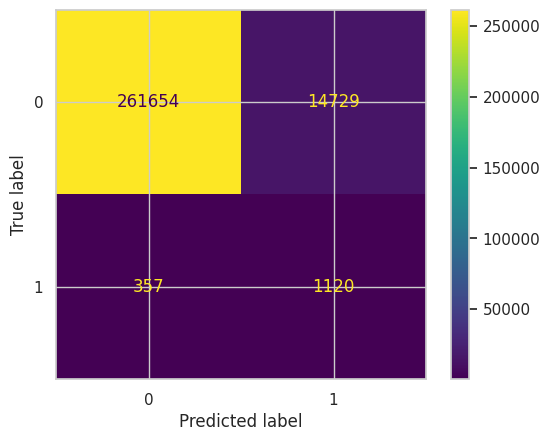

In [37]:
print("Logistic Regression Model with Best Parameter")
print("------------------")
eval(lr_tuned, X_train_scaled, X_test_scaled, y_test, y_pred_train, y_pred)

In [38]:
lr_Pred = pd.concat({
    "Actual": y_test.reset_index(drop=True),
    "lr_Pred": pd.DataFrame(y_pred, columns=['y_pred']).reset_index(drop=True)
}, axis = 1)
lr_Pred.columns = ["Actual", "lr_Pred"]

In [39]:
pd.crosstab(lr_Pred['Actual'], lr_Pred['lr_Pred'])

lr_Pred,0,1
Actual,,
0,261654,14729
1,357,1120


## 2. Model Training - Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# base model
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_model.fit(X_train_scaled, y_train)
y_pred_train = RF_model.predict(X_train_scaled)
y_pred = RF_model.predict(X_test_scaled)

Random Forest Model
------------------
[[276360     23]
 [   354   1123]]
Train_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1566360
           1       1.00      1.00      1.00      8174

    accuracy                           1.00   1574534
   macro avg       1.00      1.00      1.00   1574534
weighted avg       1.00      1.00      1.00   1574534

Test_Set - Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276383
           1       0.98      0.76      0.86      1477

    accuracy                           1.00    277860
   macro avg       0.99      0.88      0.93    277860
weighted avg       1.00      1.00      1.00    277860

------------------------------------------------------------


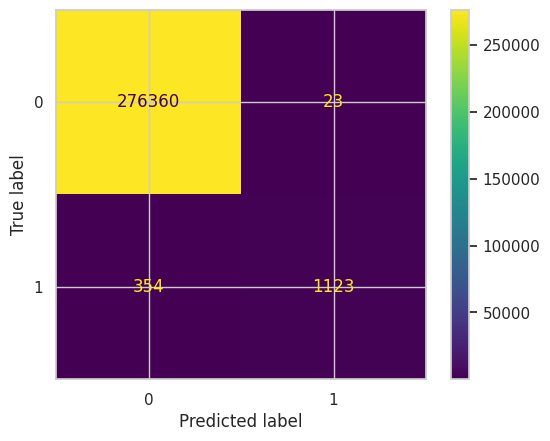

In [41]:
print("Random Forest Model")
print("------------------")
eval(RF_model, X_train_scaled, X_test_scaled, y_test, y_pred_train, y_pred)

When comparing the recall between training set and test set, it seems the model is overfitting.

In [42]:
print('Random Forest Feature Importance')
RF_feature_imp = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
RF_feature_imp

Random Forest Feature Importance


,Importance
amt,0.579422
hour,0.188332
category,0.093735
age,0.021858
city_pop,0.015659
merchant,0.011755
month,0.011477
merch_long,0.011432
job,0.011003
merch_lat,0.010995


In [43]:
import plotly.express as px
fig = px.bar(RF_feature_imp.sort_values('Importance', ascending = False), 
             x = RF_feature_imp.sort_values('Importance', ascending = False).index, 
             y = 'Importance', 
             title = "Feature Importance", 
             labels = dict(x = "Features", y ="Feature_Importance"))
fig.show()

### 5-Fold Cross Validation for Random Forest

In [44]:
print('Cross Validation scores for Random Forest with default parameters')
RF_cv = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_cv_scores = cross_validate(RF_cv, X_train_scaled, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 5)
RF_cv_scores = pd.DataFrame(RF_cv_scores, index = range(1, 6))
RF_cv_scores.mean()[2:]

Cross Validation scores for Random Forest with default parameters


test_accuracy     0.998515
test_precision    0.972661
test_recall       0.734647
test_f1           0.837044
test_roc_auc      0.987372
dtype: float64

In [45]:
RF_cv_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,454.248524,10.671709,0.998596,0.984565,0.741284,0.845778,0.988476
2,473.907539,9.780962,0.998492,0.971545,0.730887,0.834206,0.991446
3,412.737801,9.571816,0.998463,0.972108,0.724771,0.830413,0.984071
4,422.733210,9.774597,0.998507,0.964143,0.740061,0.837370,0.985064
5,415.249876,10.031551,0.998517,0.970944,0.736230,0.837452,0.987804


### Grid Search for Random Forest

In [46]:
# can be any other parameters for tuning
# param_grid = {'n_estimators' : [50, 100, 300], # number of trees in the forest
#               'max_features' : [2, 3, 4], # number of features to consider when splitting a node
#               'max_depth' : [3, 5, 7], # maximum depth of each tree, a shallow tree may underfit while a deep tree may overfit.
#               'min_samples_split' : [2, 5, 8] # minimum number of samples required to split an internal node, e.g. every node has 2 subnodes
#              } 

# RF_grid = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
# RF_grid_model = GridSearchCV(estimator = RF_grid, 
#                              param_grid = param_grid, 
#                              scoring = "f1", 
#                              n_jobs = -1, verbose = 2)
# RF_grid_model.fit(X_train_scaled, y_train)

# print('Best Estimators of GridSearchCV for Random Forest Model: '), RF_grid_model.best_estimator_)

# print('Best Parameters of GridSearchCV for Random Forest Model: '), RF_grid_model.best_params_)

In [47]:
# RF_tuned = RandomForestClassifier(class_weight = 'balanced',
#                                   max_depth = 5,
#                                   max_features = 2,
#                                   min_samples_split = 5,
#                                   n_estimators = 50,
#                                   random_state = 42).fit(X_train_scaled, y_train)

# y_train_pred = RF_tuned.predict(X_train_scaled)
# y_pred = RF_tuned.predict(X_test_scaled)
# print("Random Forest Model with Best Parameter")
# print("------------------")
# eval(RF_model, X_train_scaled, X_test_scaled, y_test, y_pred_train, y_pred)

# Unsupervised Machine Learning Method - Anomaly Detection